In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [5]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [6]:
# Specify data URI
URI = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [7]:
# Define model layers.
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          1152        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

In [8]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

C:\Users\unuiw\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 7ms/step - loss: 264.3638 - y1_output_loss: 122.4621 - y2_output_loss: 141.9017 - y1_output_root_mean_squared_error: 11.0663 - y2_output_root_mean_squared_error: 11.9122 - val_loss: 41.9126 - val_y1_output_loss: 15.9184 - val_y2_output_loss: 25.9943 - val_y1_output_root_mean_squared_error: 3.9898 - val_y2_output_root_mean_squared_error: 5.0985
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 35.6615 - y1_output_loss: 13.1441 - y2_output_loss: 22.5173 - y1_output_root_mean_squared_error: 3.6255 - y2_output_root_mean_squared_error: 4.7452 - val_loss: 53.7601 - val_y1_output_loss: 16.4624 - val_y2_output_loss: 37.2977 - val_y1_output_root_mean_squared_error: 4.0574 - val_y2_output_root_mean_squared_error: 6.1072
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 24.1339 - y1_output_loss: 9.8043 - y2_output_loss: 14.3296 - y1_output_root_mean_squared_error: 3.1312 - y2_output_root_mean_squ

Epoch 22/500
62/62 [==============================] - 0s 2ms/step - loss: 15.0376 - y1_output_loss: 6.0606 - y2_output_loss: 8.9770 - y1_output_root_mean_squared_error: 2.4618 - y2_output_root_mean_squared_error: 2.9962 - val_loss: 43.7155 - val_y1_output_loss: 13.4833 - val_y2_output_loss: 30.2322 - val_y1_output_root_mean_squared_error: 3.6720 - val_y2_output_root_mean_squared_error: 5.4984
Epoch 23/500
62/62 [==============================] - 0s 2ms/step - loss: 14.4137 - y1_output_loss: 5.8263 - y2_output_loss: 8.5874 - y1_output_root_mean_squared_error: 2.4138 - y2_output_root_mean_squared_error: 2.9304 - val_loss: 14.9938 - val_y1_output_loss: 5.8995 - val_y2_output_loss: 9.0943 - val_y1_output_root_mean_squared_error: 2.4289 - val_y2_output_root_mean_squared_error: 3.0157
Epoch 24/500
62/62 [==============================] - 0s 3ms/step - loss: 13.7603 - y1_output_loss: 5.6424 - y2_output_loss: 8.1179 - y1_output_root_mean_squared_error: 2.3754 - y2_output_root_mean_squared_erro

Epoch 43/500
62/62 [==============================] - 0s 3ms/step - loss: 9.0391 - y1_output_loss: 2.8669 - y2_output_loss: 6.1721 - y1_output_root_mean_squared_error: 1.6932 - y2_output_root_mean_squared_error: 2.4844 - val_loss: 7.0908 - val_y1_output_loss: 2.5683 - val_y2_output_loss: 4.5226 - val_y1_output_root_mean_squared_error: 1.6026 - val_y2_output_root_mean_squared_error: 2.1266
Epoch 44/500
62/62 [==============================] - 0s 3ms/step - loss: 6.6826 - y1_output_loss: 2.3367 - y2_output_loss: 4.3459 - y1_output_root_mean_squared_error: 1.5286 - y2_output_root_mean_squared_error: 2.0847 - val_loss: 8.4628 - val_y1_output_loss: 2.2392 - val_y2_output_loss: 6.2236 - val_y1_output_root_mean_squared_error: 1.4964 - val_y2_output_root_mean_squared_error: 2.4947
Epoch 45/500
62/62 [==============================] - 0s 3ms/step - loss: 6.5673 - y1_output_loss: 2.0888 - y2_output_loss: 4.4784 - y1_output_root_mean_squared_error: 1.4453 - y2_output_root_mean_squared_error: 2.11

Epoch 64/500
62/62 [==============================] - 0s 3ms/step - loss: 6.0368 - y1_output_loss: 1.6191 - y2_output_loss: 4.4176 - y1_output_root_mean_squared_error: 1.2725 - y2_output_root_mean_squared_error: 2.1018 - val_loss: 5.9811 - val_y1_output_loss: 2.0402 - val_y2_output_loss: 3.9408 - val_y1_output_root_mean_squared_error: 1.4284 - val_y2_output_root_mean_squared_error: 1.9852
Epoch 65/500
62/62 [==============================] - 0s 3ms/step - loss: 4.6417 - y1_output_loss: 1.1471 - y2_output_loss: 3.4946 - y1_output_root_mean_squared_error: 1.0710 - y2_output_root_mean_squared_error: 1.8694 - val_loss: 7.6930 - val_y1_output_loss: 2.4613 - val_y2_output_loss: 5.2316 - val_y1_output_root_mean_squared_error: 1.5689 - val_y2_output_root_mean_squared_error: 2.2873
Epoch 66/500
62/62 [==============================] - 0s 3ms/step - loss: 4.8938 - y1_output_loss: 1.1599 - y2_output_loss: 3.7339 - y1_output_root_mean_squared_error: 1.0770 - y2_output_root_mean_squared_error: 1.93

62/62 [==============================] - 0s 3ms/step - loss: 3.1131 - y1_output_loss: 0.6038 - y2_output_loss: 2.5093 - y1_output_root_mean_squared_error: 0.7770 - y2_output_root_mean_squared_error: 1.5841 - val_loss: 3.4565 - val_y1_output_loss: 0.6239 - val_y2_output_loss: 2.8327 - val_y1_output_root_mean_squared_error: 0.7899 - val_y2_output_root_mean_squared_error: 1.6830
Epoch 85/500
62/62 [==============================] - 0s 3ms/step - loss: 4.4523 - y1_output_loss: 1.1932 - y2_output_loss: 3.2591 - y1_output_root_mean_squared_error: 1.0923 - y2_output_root_mean_squared_error: 1.8053 - val_loss: 8.8844 - val_y1_output_loss: 2.3389 - val_y2_output_loss: 6.5455 - val_y1_output_root_mean_squared_error: 1.5294 - val_y2_output_root_mean_squared_error: 2.5584
Epoch 86/500
62/62 [==============================] - 0s 3ms/step - loss: 4.2310 - y1_output_loss: 1.0303 - y2_output_loss: 3.2006 - y1_output_root_mean_squared_error: 1.0151 - y2_output_root_mean_squared_error: 1.7890 - val_loss

Epoch 105/500
62/62 [==============================] - 0s 3ms/step - loss: 4.8172 - y1_output_loss: 1.3390 - y2_output_loss: 3.4782 - y1_output_root_mean_squared_error: 1.1572 - y2_output_root_mean_squared_error: 1.8650 - val_loss: 4.8340 - val_y1_output_loss: 1.3645 - val_y2_output_loss: 3.4696 - val_y1_output_root_mean_squared_error: 1.1681 - val_y2_output_root_mean_squared_error: 1.8627
Epoch 106/500
62/62 [==============================] - 0s 3ms/step - loss: 3.4247 - y1_output_loss: 0.6499 - y2_output_loss: 2.7748 - y1_output_root_mean_squared_error: 0.8062 - y2_output_root_mean_squared_error: 1.6658 - val_loss: 3.1252 - val_y1_output_loss: 0.5479 - val_y2_output_loss: 2.5773 - val_y1_output_root_mean_squared_error: 0.7402 - val_y2_output_root_mean_squared_error: 1.6054
Epoch 107/500
62/62 [==============================] - 0s 4ms/step - loss: 2.4243 - y1_output_loss: 0.4625 - y2_output_loss: 1.9618 - y1_output_root_mean_squared_error: 0.6801 - y2_output_root_mean_squared_error: 1

Epoch 126/500
62/62 [==============================] - 0s 3ms/step - loss: 3.1834 - y1_output_loss: 0.8279 - y2_output_loss: 2.3554 - y1_output_root_mean_squared_error: 0.9099 - y2_output_root_mean_squared_error: 1.5347 - val_loss: 2.5715 - val_y1_output_loss: 0.4352 - val_y2_output_loss: 2.1363 - val_y1_output_root_mean_squared_error: 0.6597 - val_y2_output_root_mean_squared_error: 1.4616
Epoch 127/500
62/62 [==============================] - 0s 2ms/step - loss: 2.0392 - y1_output_loss: 0.4071 - y2_output_loss: 1.6321 - y1_output_root_mean_squared_error: 0.6381 - y2_output_root_mean_squared_error: 1.2775 - val_loss: 2.8156 - val_y1_output_loss: 0.5042 - val_y2_output_loss: 2.3114 - val_y1_output_root_mean_squared_error: 0.7101 - val_y2_output_root_mean_squared_error: 1.5203
Epoch 128/500
62/62 [==============================] - 0s 3ms/step - loss: 2.4801 - y1_output_loss: 0.5158 - y2_output_loss: 1.9643 - y1_output_root_mean_squared_error: 0.7182 - y2_output_root_mean_squared_error: 1

Epoch 147/500
62/62 [==============================] - 0s 3ms/step - loss: 2.2307 - y1_output_loss: 0.4269 - y2_output_loss: 1.8038 - y1_output_root_mean_squared_error: 0.6534 - y2_output_root_mean_squared_error: 1.3431 - val_loss: 2.5110 - val_y1_output_loss: 0.7032 - val_y2_output_loss: 1.8078 - val_y1_output_root_mean_squared_error: 0.8386 - val_y2_output_root_mean_squared_error: 1.3446
Epoch 148/500
62/62 [==============================] - 0s 3ms/step - loss: 2.2136 - y1_output_loss: 0.4683 - y2_output_loss: 1.7453 - y1_output_root_mean_squared_error: 0.6843 - y2_output_root_mean_squared_error: 1.3211 - val_loss: 4.7891 - val_y1_output_loss: 1.2306 - val_y2_output_loss: 3.5585 - val_y1_output_root_mean_squared_error: 1.1093 - val_y2_output_root_mean_squared_error: 1.8864
Epoch 149/500
62/62 [==============================] - 0s 3ms/step - loss: 1.9336 - y1_output_loss: 0.3906 - y2_output_loss: 1.5430 - y1_output_root_mean_squared_error: 0.6250 - y2_output_root_mean_squared_error: 1

Epoch 168/500
62/62 [==============================] - 0s 3ms/step - loss: 1.8352 - y1_output_loss: 0.3611 - y2_output_loss: 1.4741 - y1_output_root_mean_squared_error: 0.6009 - y2_output_root_mean_squared_error: 1.2141 - val_loss: 2.3260 - val_y1_output_loss: 0.5473 - val_y2_output_loss: 1.7786 - val_y1_output_root_mean_squared_error: 0.7398 - val_y2_output_root_mean_squared_error: 1.3337
Epoch 169/500
62/62 [==============================] - 0s 3ms/step - loss: 1.6475 - y1_output_loss: 0.3149 - y2_output_loss: 1.3326 - y1_output_root_mean_squared_error: 0.5612 - y2_output_root_mean_squared_error: 1.1544 - val_loss: 2.2107 - val_y1_output_loss: 0.3382 - val_y2_output_loss: 1.8725 - val_y1_output_root_mean_squared_error: 0.5815 - val_y2_output_root_mean_squared_error: 1.3684
Epoch 170/500
62/62 [==============================] - 0s 3ms/step - loss: 2.6716 - y1_output_loss: 0.5239 - y2_output_loss: 2.1478 - y1_output_root_mean_squared_error: 0.7238 - y2_output_root_mean_squared_error: 1

62/62 [==============================] - 0s 3ms/step - loss: 1.4392 - y1_output_loss: 0.3145 - y2_output_loss: 1.1247 - y1_output_root_mean_squared_error: 0.5608 - y2_output_root_mean_squared_error: 1.0605 - val_loss: 6.1809 - val_y1_output_loss: 0.3855 - val_y2_output_loss: 5.7954 - val_y1_output_root_mean_squared_error: 0.6209 - val_y2_output_root_mean_squared_error: 2.4074
Epoch 189/500
62/62 [==============================] - 0s 3ms/step - loss: 1.5099 - y1_output_loss: 0.2908 - y2_output_loss: 1.2191 - y1_output_root_mean_squared_error: 0.5392 - y2_output_root_mean_squared_error: 1.1041 - val_loss: 1.9325 - val_y1_output_loss: 0.5062 - val_y2_output_loss: 1.4263 - val_y1_output_root_mean_squared_error: 0.7115 - val_y2_output_root_mean_squared_error: 1.1943
Epoch 190/500
62/62 [==============================] - 0s 3ms/step - loss: 1.6417 - y1_output_loss: 0.3073 - y2_output_loss: 1.3344 - y1_output_root_mean_squared_error: 0.5543 - y2_output_root_mean_squared_error: 1.1552 - val_lo

Epoch 209/500
62/62 [==============================] - 0s 3ms/step - loss: 2.0301 - y1_output_loss: 0.4394 - y2_output_loss: 1.5907 - y1_output_root_mean_squared_error: 0.6629 - y2_output_root_mean_squared_error: 1.2612 - val_loss: 1.9912 - val_y1_output_loss: 0.3700 - val_y2_output_loss: 1.6212 - val_y1_output_root_mean_squared_error: 0.6083 - val_y2_output_root_mean_squared_error: 1.2733
Epoch 210/500
62/62 [==============================] - 0s 3ms/step - loss: 1.2695 - y1_output_loss: 0.2576 - y2_output_loss: 1.0118 - y1_output_root_mean_squared_error: 0.5076 - y2_output_root_mean_squared_error: 1.0059 - val_loss: 2.2876 - val_y1_output_loss: 0.3694 - val_y2_output_loss: 1.9183 - val_y1_output_root_mean_squared_error: 0.6078 - val_y2_output_root_mean_squared_error: 1.3850
Epoch 211/500
62/62 [==============================] - 0s 3ms/step - loss: 1.5096 - y1_output_loss: 0.2965 - y2_output_loss: 1.2131 - y1_output_root_mean_squared_error: 0.5445 - y2_output_root_mean_squared_error: 1

Epoch 230/500
62/62 [==============================] - 0s 3ms/step - loss: 1.2615 - y1_output_loss: 0.2561 - y2_output_loss: 1.0054 - y1_output_root_mean_squared_error: 0.5061 - y2_output_root_mean_squared_error: 1.0027 - val_loss: 4.1040 - val_y1_output_loss: 0.5218 - val_y2_output_loss: 3.5822 - val_y1_output_root_mean_squared_error: 0.7224 - val_y2_output_root_mean_squared_error: 1.8927
Epoch 231/500
62/62 [==============================] - 0s 3ms/step - loss: 1.5691 - y1_output_loss: 0.3276 - y2_output_loss: 1.2415 - y1_output_root_mean_squared_error: 0.5724 - y2_output_root_mean_squared_error: 1.1142 - val_loss: 3.4347 - val_y1_output_loss: 0.6224 - val_y2_output_loss: 2.8122 - val_y1_output_root_mean_squared_error: 0.7889 - val_y2_output_root_mean_squared_error: 1.6770
Epoch 232/500
62/62 [==============================] - 0s 3ms/step - loss: 1.6499 - y1_output_loss: 0.3565 - y2_output_loss: 1.2934 - y1_output_root_mean_squared_error: 0.5971 - y2_output_root_mean_squared_error: 1

62/62 [==============================] - 0s 3ms/step - loss: 1.4070 - y1_output_loss: 0.3056 - y2_output_loss: 1.1014 - y1_output_root_mean_squared_error: 0.5528 - y2_output_root_mean_squared_error: 1.0495 - val_loss: 1.4047 - val_y1_output_loss: 0.2616 - val_y2_output_loss: 1.1431 - val_y1_output_root_mean_squared_error: 0.5115 - val_y2_output_root_mean_squared_error: 1.0692
Epoch 251/500
62/62 [==============================] - 0s 3ms/step - loss: 1.1403 - y1_output_loss: 0.2312 - y2_output_loss: 0.9090 - y1_output_root_mean_squared_error: 0.4809 - y2_output_root_mean_squared_error: 0.9534 - val_loss: 2.5522 - val_y1_output_loss: 0.4400 - val_y2_output_loss: 2.1122 - val_y1_output_root_mean_squared_error: 0.6633 - val_y2_output_root_mean_squared_error: 1.4533
Epoch 252/500
62/62 [==============================] - 0s 3ms/step - loss: 1.4707 - y1_output_loss: 0.2531 - y2_output_loss: 1.2175 - y1_output_root_mean_squared_error: 0.5031 - y2_output_root_mean_squared_error: 1.1034 - val_lo

Epoch 271/500
62/62 [==============================] - 0s 4ms/step - loss: 1.1349 - y1_output_loss: 0.2227 - y2_output_loss: 0.9122 - y1_output_root_mean_squared_error: 0.4719 - y2_output_root_mean_squared_error: 0.9551 - val_loss: 1.8335 - val_y1_output_loss: 0.2388 - val_y2_output_loss: 1.5946 - val_y1_output_root_mean_squared_error: 0.4887 - val_y2_output_root_mean_squared_error: 1.2628
Epoch 272/500
62/62 [==============================] - 0s 3ms/step - loss: 0.9248 - y1_output_loss: 0.1867 - y2_output_loss: 0.7380 - y1_output_root_mean_squared_error: 0.4321 - y2_output_root_mean_squared_error: 0.8591 - val_loss: 1.7177 - val_y1_output_loss: 0.3203 - val_y2_output_loss: 1.3973 - val_y1_output_root_mean_squared_error: 0.5660 - val_y2_output_root_mean_squared_error: 1.1821
Epoch 273/500
62/62 [==============================] - 0s 3ms/step - loss: 0.9141 - y1_output_loss: 0.2288 - y2_output_loss: 0.6853 - y1_output_root_mean_squared_error: 0.4783 - y2_output_root_mean_squared_error: 0

Epoch 292/500
62/62 [==============================] - 0s 3ms/step - loss: 0.8118 - y1_output_loss: 0.1817 - y2_output_loss: 0.6301 - y1_output_root_mean_squared_error: 0.4263 - y2_output_root_mean_squared_error: 0.7938 - val_loss: 1.8647 - val_y1_output_loss: 0.2234 - val_y2_output_loss: 1.6413 - val_y1_output_root_mean_squared_error: 0.4726 - val_y2_output_root_mean_squared_error: 1.2811
Epoch 293/500
62/62 [==============================] - 0s 3ms/step - loss: 0.8491 - y1_output_loss: 0.2043 - y2_output_loss: 0.6448 - y1_output_root_mean_squared_error: 0.4520 - y2_output_root_mean_squared_error: 0.8030 - val_loss: 2.2089 - val_y1_output_loss: 0.7983 - val_y2_output_loss: 1.4107 - val_y1_output_root_mean_squared_error: 0.8935 - val_y2_output_root_mean_squared_error: 1.1877
Epoch 294/500
62/62 [==============================] - 0s 3ms/step - loss: 0.7245 - y1_output_loss: 0.1712 - y2_output_loss: 0.5532 - y1_output_root_mean_squared_error: 0.4138 - y2_output_root_mean_squared_error: 0

Epoch 313/500
62/62 [==============================] - 0s 3ms/step - loss: 0.9000 - y1_output_loss: 0.2400 - y2_output_loss: 0.6600 - y1_output_root_mean_squared_error: 0.4899 - y2_output_root_mean_squared_error: 0.8124 - val_loss: 1.3171 - val_y1_output_loss: 0.2550 - val_y2_output_loss: 1.0621 - val_y1_output_root_mean_squared_error: 0.5050 - val_y2_output_root_mean_squared_error: 1.0306
Epoch 314/500
62/62 [==============================] - 0s 3ms/step - loss: 0.7085 - y1_output_loss: 0.1824 - y2_output_loss: 0.5261 - y1_output_root_mean_squared_error: 0.4270 - y2_output_root_mean_squared_error: 0.7254 - val_loss: 2.1647 - val_y1_output_loss: 0.3715 - val_y2_output_loss: 1.7932 - val_y1_output_root_mean_squared_error: 0.6095 - val_y2_output_root_mean_squared_error: 1.3391
Epoch 315/500
62/62 [==============================] - 0s 3ms/step - loss: 0.7945 - y1_output_loss: 0.1800 - y2_output_loss: 0.6145 - y1_output_root_mean_squared_error: 0.4243 - y2_output_root_mean_squared_error: 0

Epoch 334/500
62/62 [==============================] - 0s 2ms/step - loss: 0.8035 - y1_output_loss: 0.1919 - y2_output_loss: 0.6116 - y1_output_root_mean_squared_error: 0.4381 - y2_output_root_mean_squared_error: 0.7820 - val_loss: 1.3986 - val_y1_output_loss: 0.2338 - val_y2_output_loss: 1.1648 - val_y1_output_root_mean_squared_error: 0.4835 - val_y2_output_root_mean_squared_error: 1.0792
Epoch 335/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6212 - y1_output_loss: 0.1559 - y2_output_loss: 0.4653 - y1_output_root_mean_squared_error: 0.3948 - y2_output_root_mean_squared_error: 0.6821 - val_loss: 1.4213 - val_y1_output_loss: 0.2645 - val_y2_output_loss: 1.1568 - val_y1_output_root_mean_squared_error: 0.5143 - val_y2_output_root_mean_squared_error: 1.0756
Epoch 336/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6407 - y1_output_loss: 0.1655 - y2_output_loss: 0.4752 - y1_output_root_mean_squared_error: 0.4068 - y2_output_root_mean_squared_error: 0

Epoch 355/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5966 - y1_output_loss: 0.1387 - y2_output_loss: 0.4579 - y1_output_root_mean_squared_error: 0.3724 - y2_output_root_mean_squared_error: 0.6767 - val_loss: 2.4357 - val_y1_output_loss: 0.3259 - val_y2_output_loss: 2.1097 - val_y1_output_root_mean_squared_error: 0.5709 - val_y2_output_root_mean_squared_error: 1.4525
Epoch 356/500
62/62 [==============================] - 0s 3ms/step - loss: 0.9312 - y1_output_loss: 0.2375 - y2_output_loss: 0.6937 - y1_output_root_mean_squared_error: 0.4874 - y2_output_root_mean_squared_error: 0.8329 - val_loss: 1.9072 - val_y1_output_loss: 0.2722 - val_y2_output_loss: 1.6350 - val_y1_output_root_mean_squared_error: 0.5217 - val_y2_output_root_mean_squared_error: 1.2787
Epoch 357/500
62/62 [==============================] - 0s 3ms/step - loss: 0.8285 - y1_output_loss: 0.1813 - y2_output_loss: 0.6472 - y1_output_root_mean_squared_error: 0.4258 - y2_output_root_mean_squared_error: 0

Epoch 376/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6859 - y1_output_loss: 0.1800 - y2_output_loss: 0.5059 - y1_output_root_mean_squared_error: 0.4242 - y2_output_root_mean_squared_error: 0.7113 - val_loss: 1.3294 - val_y1_output_loss: 0.3764 - val_y2_output_loss: 0.9530 - val_y1_output_root_mean_squared_error: 0.6135 - val_y2_output_root_mean_squared_error: 0.9762
Epoch 377/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5208 - y1_output_loss: 0.1663 - y2_output_loss: 0.3545 - y1_output_root_mean_squared_error: 0.4078 - y2_output_root_mean_squared_error: 0.5954 - val_loss: 2.3873 - val_y1_output_loss: 0.3017 - val_y2_output_loss: 2.0856 - val_y1_output_root_mean_squared_error: 0.5493 - val_y2_output_root_mean_squared_error: 1.4442
Epoch 378/500
62/62 [==============================] - 0s 3ms/step - loss: 0.7718 - y1_output_loss: 0.1959 - y2_output_loss: 0.5759 - y1_output_root_mean_squared_error: 0.4426 - y2_output_root_mean_squared_error: 0

62/62 [==============================] - 0s 4ms/step - loss: 0.9128 - y1_output_loss: 0.2146 - y2_output_loss: 0.6982 - y1_output_root_mean_squared_error: 0.4632 - y2_output_root_mean_squared_error: 0.8356 - val_loss: 1.3490 - val_y1_output_loss: 0.2549 - val_y2_output_loss: 1.0941 - val_y1_output_root_mean_squared_error: 0.5049 - val_y2_output_root_mean_squared_error: 1.0460
Epoch 397/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5784 - y1_output_loss: 0.1556 - y2_output_loss: 0.4229 - y1_output_root_mean_squared_error: 0.3944 - y2_output_root_mean_squared_error: 0.6503 - val_loss: 1.4277 - val_y1_output_loss: 0.2940 - val_y2_output_loss: 1.1337 - val_y1_output_root_mean_squared_error: 0.5423 - val_y2_output_root_mean_squared_error: 1.0647
Epoch 398/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6643 - y1_output_loss: 0.1611 - y2_output_loss: 0.5033 - y1_output_root_mean_squared_error: 0.4014 - y2_output_root_mean_squared_error: 0.7094 - val_lo

Epoch 417/500
62/62 [==============================] - 0s 4ms/step - loss: 0.6005 - y1_output_loss: 0.1558 - y2_output_loss: 0.4447 - y1_output_root_mean_squared_error: 0.3947 - y2_output_root_mean_squared_error: 0.6668 - val_loss: 1.0915 - val_y1_output_loss: 0.2036 - val_y2_output_loss: 0.8879 - val_y1_output_root_mean_squared_error: 0.4513 - val_y2_output_root_mean_squared_error: 0.9423
Epoch 418/500
62/62 [==============================] - 0s 3ms/step - loss: 0.4208 - y1_output_loss: 0.1244 - y2_output_loss: 0.2964 - y1_output_root_mean_squared_error: 0.3527 - y2_output_root_mean_squared_error: 0.5444 - val_loss: 1.3734 - val_y1_output_loss: 0.3320 - val_y2_output_loss: 1.0414 - val_y1_output_root_mean_squared_error: 0.5762 - val_y2_output_root_mean_squared_error: 1.0205
Epoch 419/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5799 - y1_output_loss: 0.1510 - y2_output_loss: 0.4289 - y1_output_root_mean_squared_error: 0.3886 - y2_output_root_mean_squared_error: 0

Epoch 438/500
62/62 [==============================] - 0s 3ms/step - loss: 0.4137 - y1_output_loss: 0.1257 - y2_output_loss: 0.2880 - y1_output_root_mean_squared_error: 0.3546 - y2_output_root_mean_squared_error: 0.5366 - val_loss: 1.5219 - val_y1_output_loss: 0.3025 - val_y2_output_loss: 1.2193 - val_y1_output_root_mean_squared_error: 0.5500 - val_y2_output_root_mean_squared_error: 1.1042
Epoch 439/500
62/62 [==============================] - 0s 3ms/step - loss: 0.4385 - y1_output_loss: 0.1408 - y2_output_loss: 0.2976 - y1_output_root_mean_squared_error: 0.3753 - y2_output_root_mean_squared_error: 0.5455 - val_loss: 1.4444 - val_y1_output_loss: 0.2052 - val_y2_output_loss: 1.2393 - val_y1_output_root_mean_squared_error: 0.4529 - val_y2_output_root_mean_squared_error: 1.1132
Epoch 440/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5173 - y1_output_loss: 0.1428 - y2_output_loss: 0.3745 - y1_output_root_mean_squared_error: 0.3779 - y2_output_root_mean_squared_error: 0

Epoch 459/500
62/62 [==============================] - 0s 3ms/step - loss: 0.4543 - y1_output_loss: 0.1336 - y2_output_loss: 0.3207 - y1_output_root_mean_squared_error: 0.3655 - y2_output_root_mean_squared_error: 0.5663 - val_loss: 1.3493 - val_y1_output_loss: 0.2520 - val_y2_output_loss: 1.0973 - val_y1_output_root_mean_squared_error: 0.5020 - val_y2_output_root_mean_squared_error: 1.0475
Epoch 460/500
62/62 [==============================] - 0s 4ms/step - loss: 0.5321 - y1_output_loss: 0.1430 - y2_output_loss: 0.3891 - y1_output_root_mean_squared_error: 0.3781 - y2_output_root_mean_squared_error: 0.6238 - val_loss: 1.3369 - val_y1_output_loss: 0.3106 - val_y2_output_loss: 1.0262 - val_y1_output_root_mean_squared_error: 0.5573 - val_y2_output_root_mean_squared_error: 1.0130
Epoch 461/500
62/62 [==============================] - 0s 4ms/step - loss: 0.4082 - y1_output_loss: 0.1223 - y2_output_loss: 0.2859 - y1_output_root_mean_squared_error: 0.3497 - y2_output_root_mean_squared_error: 0

Epoch 480/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6260 - y1_output_loss: 0.1841 - y2_output_loss: 0.4419 - y1_output_root_mean_squared_error: 0.4291 - y2_output_root_mean_squared_error: 0.6647 - val_loss: 1.2104 - val_y1_output_loss: 0.2438 - val_y2_output_loss: 0.9666 - val_y1_output_root_mean_squared_error: 0.4938 - val_y2_output_root_mean_squared_error: 0.9831
Epoch 481/500
62/62 [==============================] - 0s 3ms/step - loss: 0.3644 - y1_output_loss: 0.1127 - y2_output_loss: 0.2517 - y1_output_root_mean_squared_error: 0.3357 - y2_output_root_mean_squared_error: 0.5017 - val_loss: 1.2372 - val_y1_output_loss: 0.2249 - val_y2_output_loss: 1.0124 - val_y1_output_root_mean_squared_error: 0.4742 - val_y2_output_root_mean_squared_error: 1.0062
Epoch 482/500
62/62 [==============================] - 0s 3ms/step - loss: 0.4684 - y1_output_loss: 0.1239 - y2_output_loss: 0.3445 - y1_output_root_mean_squared_error: 0.3520 - y2_output_root_mean_squared_error: 0

62/62 [==============================] - 0s 3ms/step - loss: 0.4089 - y1_output_loss: 0.1328 - y2_output_loss: 0.2761 - y1_output_root_mean_squared_error: 0.3645 - y2_output_root_mean_squared_error: 0.5255 - val_loss: 1.1501 - val_y1_output_loss: 0.2353 - val_y2_output_loss: 0.9148 - val_y1_output_root_mean_squared_error: 0.4851 - val_y2_output_root_mean_squared_error: 0.9564


In [10]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 6ms/step - loss: 1.1501 - y1_output_loss: 0.2353 - y2_output_loss: 0.9148 - y1_output_root_mean_squared_error: 0.4851 - y2_output_root_mean_squared_error: 0.9564
Loss = 1.1500842571258545, Y1_loss = 0.23530025780200958, Y1_mse = 0.4850775897502899, Y2_loss = 0.9147838950157166, Y2_mse = 0.9564433693885803


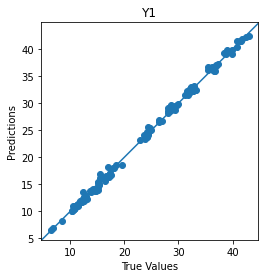

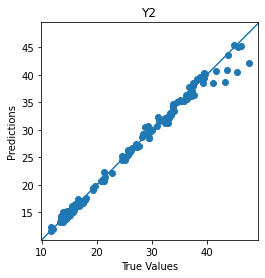

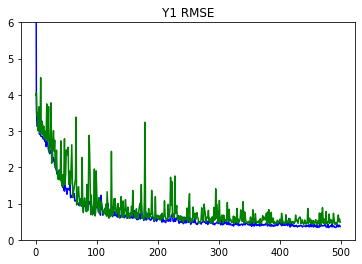

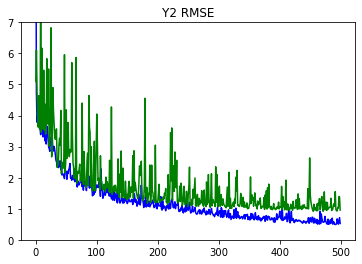

In [11]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)